In [0]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel


**1) Draw the moral graph, triangulated graph and the junction tree**

Setting the structure

In [0]:
asia_net_model = BayesianModel([('asia','tub'),
                                ('smoke','lung'),
                                ('smoke','bronc'),
                                ('tub','either'),
                                ('lung','either'),
                                ('either','xray'),
                                ('bronc','dysp'),
                                ('either','dysp')])

Setting up the relationships

In [0]:
asia_cpd = TabularCPD(variable = 'asia',
                      variable_card = 2,
                      values = [[.01,.99]])

In [0]:
tub_cpd = TabularCPD(variable='tub',
                      variable_card=2,
                      values=[[.05,.01],[.95,.99]],
                      evidence=['asia'],
                      evidence_card=[2])


In [0]:
smoke_cpd = TabularCPD(variable = 'smoke',
                       variable_card = 2,
                       values = [[.5,.5]])

In [0]:
lung_cpd = TabularCPD(variable='lung',
                      variable_card=2,
                      values=[[.1,.01],[.9,.99]],
                      evidence=['smoke'],
                      evidence_card=[2])

In [0]:
bronc_cpd = TabularCPD(variable='bronc',
                       variable_card=2,
                       values=[[.6,.3],[.4,.7]],
                       evidence=['smoke'],
                       evidence_card=[2])

In [0]:
either_cpd = TabularCPD(variable='either',
                      variable_card=2,
                      values=[[1,1,1,0],[0,0,0,1]],
                      evidence=['lung','tub'],
                      evidence_card=[2,2])

In [0]:
xray_cpd = TabularCPD(variable='xray',
                    variable_card=2,
                    values=[[.98,.05],[.02,.95]],
                    evidence=['either'],
                    evidence_card=[2])

In [0]:
dysp_cpd = TabularCPD(variable='dysp',
                    variable_card=2,
                    values=[[.9,.7,.8,.1],[.1,.3,.2,.9]],
                    evidence=['either','bronc'],
                    evidence_card=[2,2])

Adding relationships to the model


In [0]:
asia_net_model.add_cpds(asia_cpd, smoke_cpd, tub_cpd, lung_cpd, bronc_cpd, either_cpd, xray_cpd, dysp_cpd)

Structure of the graph

In [0]:
asia_net_model.get_cpds()

[<TabularCPD representing P(asia:2) at 0x7f3d6bacd208>,
 <TabularCPD representing P(smoke:2) at 0x7f3d6bacd550>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7f3d6bacd5c0>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7f3d6bacdc88>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7f3d6bacdcc0>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7f3d6bacd6a0>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7f3d6bacdd68>,
 <TabularCPD representing P(dysp:2 | either:2, bronc:2) at 0x7f3d6bacde48>]

In [0]:
for cpd in asia_net_model.get_cpds():
    print("\nCPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of asia:
+---------+------+
| asia(0) | 0.01 |
+---------+------+
| asia(1) | 0.99 |
+---------+------+

CPD of smoke:
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+

CPD of tub:
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| tub(1) | 0.95    | 0.99    |
+--------+---------+---------+

CPD of lung:
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| lung(1) | 0.9      | 0.99     |
+---------+----------+----------+

CPD of bronc:
+----------+----------+----------+
| smoke    | smoke(0) | smoke(1) |
+----------+----------+----------+
| bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+

CPD of either:
+-----------+---------+

In [0]:
from pgmpy.inference import VariableElimination


In [0]:
model_inference = VariableElimination(asia_net_model)

In [0]:
q = model_inference.query(variables=['tub','lung','bronc'], evidence={'asia':0,'xray':0})
print(q)

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 305.60it/s]

+---------+--------+----------+-----------------------+
| lung    | tub    | bronc    |   phi(lung,tub,bronc) |
+=========+========+==========+=======================+
| lung(0) | tub(0) | bronc(0) |                0.0106 |
+---------+--------+----------+-----------------------+
| lung(0) | tub(0) | bronc(1) |                0.0079 |
+---------+--------+----------+-----------------------+
| lung(0) | tub(1) | bronc(0) |                0.2021 |
+---------+--------+----------+-----------------------+
| lung(0) | tub(1) | bronc(1) |                0.1508 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(0) | bronc(0) |                0.1413 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(0) | bronc(1) |                0.1778 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(1) | bronc(0) |                0.1370 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(1) | bronc(1) |                0

In [0]:
moral = asia_net_model.to_markov_model()
triangulate = moral.triangulate()
junction_tree = triangulate.to_junction_tree()

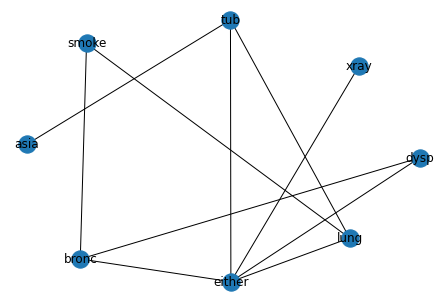

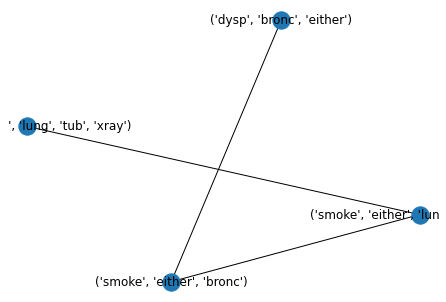

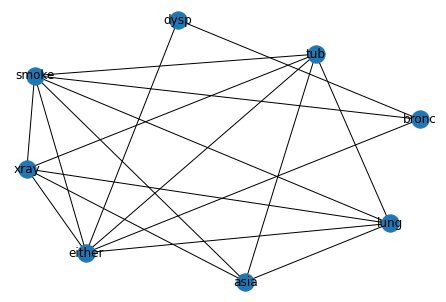

In [0]:
import networkx as nk
import matplotlib.pyplot as plt

nk.draw(moral, with_labels=True)
plt.show()
nk.draw(junction_tree, with_labels=True)
plt.show()
nk.draw(triangulate, with_labels=True)
plt.show()

**Explain why the "running intersection property" is satisfied in your junction tree.**



In our model, a tree whose nodes are a set of variables that contains a node for each of our factors.\
In variable elimination as seen, once a variable X is added
to our current table T, it stays in T until eliminated,
then never appears again.\
In Junction Tree, this means all sets containing X form a
connected region of tree, where\
true for all X satisfies running intersection property

**2)** **Describe how the different terms on the right hand side of **$"p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)"$ \
**are distributed among the different juction tree clusters. Write out the messages using these terms and verify that the message passing algorithm indeed gives the cluster marginals**

The joint probability of all random variables is distributing the terms among the different junction tree clusters by "variable elimination"

**References:**\
1) https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Bayesian%20Network.ipynb \
2) https://github.com/pgmpy/pgmpy/blob/dev/examples/Inference%20in%20Bayesian%20Networks.ipynb